# **Machine Learning Classification**

## Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV

# Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, make_scorer

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

## Load Data

In [2]:
df = pd.read_csv('data/hotel_booking_feature_engineering.csv')
pd.options.display.max_columns = None   #para que muestren todas las columnas
df.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,hotel_City Hotel,hotel_Resort Hotel,arrival_date_month_April,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September,meal_?,meal_BB,meal_FB,meal_HB,meal_SC,meal_Undefined,country_ABW,country_AGO,country_AIA,country_ALB,country_AND,country_ARE,country_ARG,country_ARM,country_ASM,country_ATA,country_ATF,country_AUS,country_AUT,country_AZE,country_BDI,country_BEL,country_BEN,country_BFA,country_BGD,country_BGR,country_BHR,country_BHS,country_BIH,country_BLR,country_BOL,country_BRA,country_BRB,country_BWA,country_CAF,country_CHE,country_CHL,country_CHN,country_CIV,country_CMR,country_CN,country_COL,country_COM,country_CPV,country_CRI,country_CUB,country_CYM,country_CYP,country_CZE,country_DEU,country_DJI,country_DMA,country_DNK,country_DOM,country_DZA,country_ECU,country_EGY,country_ESP,country_EST,country_ETH,country_FIN,country_FJI,country_FRA,country_FRO,country_GAB,country_GBR,country_GEO,country_GGY,country_GHA,country_GIB,country_GLP,country_GNB,country_GRC,country_GTM,country_GUY,country_HKG,country_HND,country_HRV,country_HUN,country_IDN,country_IMN,country_IND,country_IRL,country_IRN,country_IRQ,country_ISL,country_ISR,country_ITA,country_JAM,country_JEY,country_JOR,country_JPN,country_KAZ,country_KEN,country_KHM,country_KIR,country_KNA,country_KOR,country_KWT,country_LAO,country_LBN,country_LBY,country_LCA,country_LIE,country_LKA,country_LTU,country_LUX,country_LVA,country_MAC,country_MAR,country_MCO,country_MDG,country_MDV,country_MEX,country_MKD,country_MLI,country_MLT,country_MMR,country_MNE,country_MOZ,country_MRT,country_MUS,country_MWI,country_MYS,country_MYT,country_NAM,country_NCL,country_NGA,country_NIC,country_NLD,country_NOR,country_NPL,country_NZL,country_No Country,country_OMN,country_PAK,country_PAN,country_PER,country_PHL,country_PLW,country_POL,country_PRI,country_PRT,country_PRY,country_PYF,country_QAT,country_ROU,country_RUS,country_RWA,country_SAU,country_SDN,country_SEN,country_SGP,country_SLE,country_SLV,country_SMR,country_SRB,country_STP,country_SUR,country_SVK,country_SVN,country_SWE,country_SYC,country_SYR,country_TGO,country_THA,country_TJK,country_TMP,country_TUN,country_TUR,country_TWN,country_TZA,country_UGA,country_UKR,country_UMI,country_URY,country_USA,country_UZB,country_VEN,country_VGB,country_VNM,country_ZAF,country_ZMB,country_ZWE,market_segment_Aviation,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,distribution_channel_Corporate,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,reserved_room_type_A,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,reserved_room_type_P,assigned_room_type_A,assigned_room_type_B,assigned_room_type_C,assigned_room_type_D,assigned_room_type_E,assigned_room_type_F,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,342,2015,27,1,0,0,2,0.0,0,0,0,0,3,0.0,0.0,0,0.0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [3]:
df.shape

(119390, 260)

## Train / Test

In [4]:
X = df.drop('is_canceled', axis=1)
y = df['is_canceled']

# Train / Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [5]:
sampled_idxs = np.random.choice(range(len(X_train)), size=20000, replace=False)
X_train2 = X_train.iloc[sampled_idxs]
y_train2 = y_train.iloc[sampled_idxs]

## Cross-validation

In [6]:
df['is_canceled'].value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

In [4]:
from sklearn.model_selection import StratifiedKFold, cross_validate

In [8]:
# Declare KFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [9]:
# Declare scores to be used
scoring = {
    'Acc': make_scorer(accuracy_score),
    'Prec': make_scorer(precision_score),
    'Rec': make_scorer(recall_score)
}

In [10]:
def print_metrics(cv_results):
    for sc in scoring.keys():
        print(f'Train {sc}:', cv_results[f'train_{sc}'].mean().round(2))
    print()
    for sc in scoring.keys():
        print(f'Validation {sc}:', cv_results[f'test_{sc}'].mean().round(2))

def print_metrics_rs(rs):
    print(f"Train Precicios: {rs.cv_results_['mean_train_Prec'].mean().round(2)}")   
    print(f"Validation Precision: {rs.cv_results_['mean_test_Prec'].mean().round(2)}")
    print()     
    print(f"Train Recoll: {rs.cv_results_['mean_train_Rec'].mean().round(2)}")   
    print(f"Validation Recoll: {rs.cv_results_['mean_test_Rec'].mean().round(2)}")
    print()     
    print(f"Train Accuracy: {rs.cv_results_['mean_train_Acc'].mean().round(2)}")   
    print(f"Validation Accuracy: {rs.cv_results_['mean_test_Acc'].mean().round(2)}")

## Baseline

In [77]:
from sklearn.dummy import DummyClassifier

In [78]:
bl = DummyClassifier(strategy='most_frequent')
bl_cv = cross_validate(bl, X_train, y_train, cv=kf,
                       scoring=scoring, return_train_score=True)

print_metrics(bl_cv)

c:\Users\Alumne_mati1\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Alumne_mati1\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Alumne_mati1\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Alumne_mati1\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: Undefi

Train Acc: 0.63
Train Prec: 0.0
Train Rec: 0.0

Validation Acc: 0.63
Validation Prec: 0.0
Validation Rec: 0.0


c:\Users\Alumne_mati1\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Alumne_mati1\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Logistic Regression

In [80]:
lr = LogisticRegression(max_iter=10_000)
lr_cv = cross_validate(lr, X_train2, y_train2, cv=kf,
                       scoring=scoring, return_train_score=True)

print_metrics(lr_cv)

Train Acc: 0.82
Train Prec: 0.82
Train Rec: 0.66

Validation Acc: 0.82
Validation Prec: 0.82
Validation Rec: 0.66


## K-Neighbours Classifier

In [5]:
from sklearn.preprocessing import MaxAbsScaler, MinMaxScaler, RobustScaler, StandardScaler
from sklearn.pipeline import Pipeline

In [82]:
param_dist = {
    "scale": [StandardScaler(), RobustScaler(), MinMaxScaler(), MaxAbsScaler()],
    "knn__n_neighbors": [3, 5, 8, 10, 12, 15, 20],
    "knn__weights": ["uniform", "distance"],
    "knn__p": [1, 2]
}

knn = Pipeline([
    ('scale', None),
    ('knn', KNeighborsClassifier(n_jobs=-1))
])

knn_rscv = RandomizedSearchCV(knn, param_distributions=param_dist,
                              scoring=scoring, return_train_score=True,
                              cv=kf,
                              refit="Prec", n_jobs=-1)

knn_rscv.fit(X_train2, y_train2)
print("Mejores parámetros de RandomizedSearchCV: ", knn_rscv.best_params_)

Mejores parámetros de RandomizedSearchCV:  {'scale': RobustScaler(), 'knn__weights': 'uniform', 'knn__p': 1, 'knn__n_neighbors': 10}


In [83]:
print_metrics_rs(knn_rscv)

Train Precicios: 0.89
Validation Precision: 0.75

Train Recoll: 0.81
Validation Recoll: 0.66

Train Accuracy: 0.89
Validation Accuracy: 0.79


### Confusion Matrix 

In [6]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

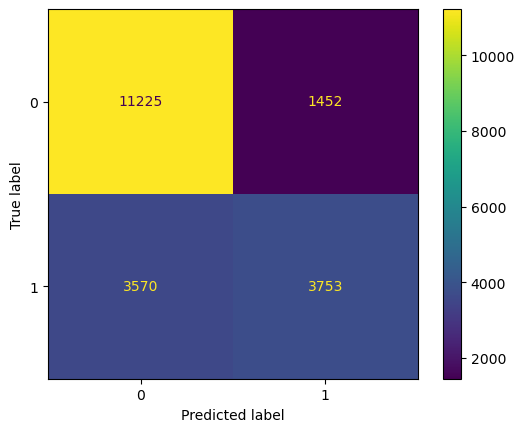

In [86]:
knn = Pipeline([
    ('scale', None),
    ('knn', KNeighborsClassifier(n_jobs=-1, n_neighbors=10, p=1, weights="uniform"))
])

# cross_val_predict returns the predictions for each data point in the validation sets
val_preds = cross_val_predict(knn, X_train2, y_train2, cv=kf)

cm = confusion_matrix(y_train2, val_preds, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=[0, 1])
disp.plot()
plt.show()

## Decision Tree

In [87]:
param_dist = {
    "max_depth": [3, 5, 10, 20, 50, 100, None],
    "min_samples_split": np.arange(2, 11),
    "min_samples_leaf": np.arange(1, 11),    
    "criterion": ["entropy", "log_loss", "gini"]
}
dt = DecisionTreeClassifier()
dt_rscv = RandomizedSearchCV(dt, param_distributions=param_dist,
                             scoring=scoring, return_train_score=True,
                             n_iter=50, cv=kf, verbose=1,
                             refit="Prec", n_jobs=-1)

dt_rscv.fit(X_train2, y_train2)
print("Best RandomizedSearchCV parameters: ", dt_rscv.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best RandomizedSearchCV parameters:  {'min_samples_split': 8, 'min_samples_leaf': 9, 'max_depth': 3, 'criterion': 'entropy'}


In [88]:
print_metrics_rs(dt_rscv)

Train Precicios: 0.91
Validation Precision: 0.82

Train Recoll: 0.75
Validation Recoll: 0.67

Train Accuracy: 0.88
Validation Accuracy: 0.82


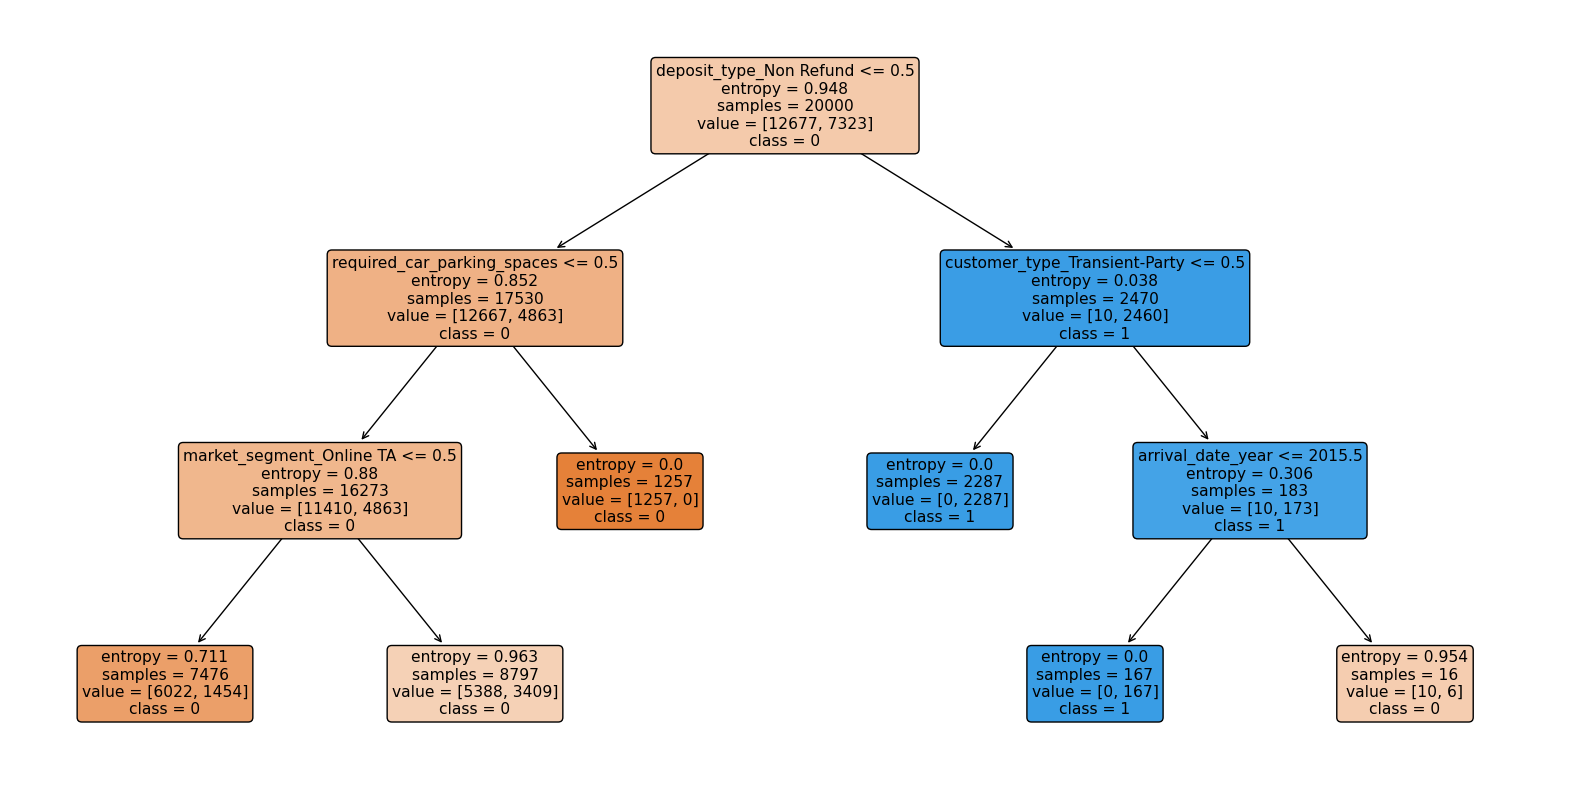

In [94]:
plt.figure(figsize=(20,10))
plot_tree(dt_rscv.best_estimator_, filled=True, feature_names=list(X.columns),
          class_names=['0', '1'], rounded=True)
plt.show()

### Confusion Matrix

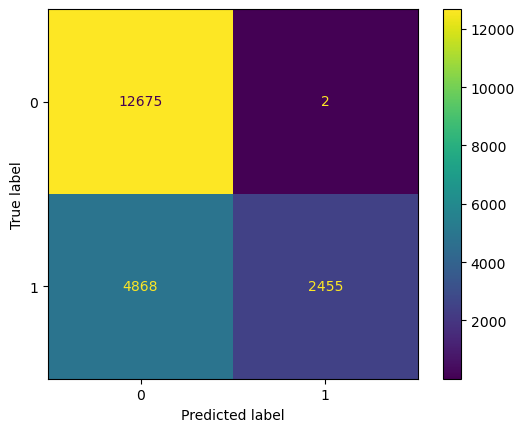

In [95]:
#dt = DecisionTreeClassifier(max_depth=3, min_samples_split=8, min_samples_leaf=9, criterion="entropy")
# cross_val_predict returns the predictions for each data point in the validation sets
val_preds = cross_val_predict(dt_rscv.best_estimator_, X_train2, y_train2, cv=kf)

cm = confusion_matrix(y_train2, val_preds, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=[0, 1])
disp.plot()
plt.show()

## Random Forest

In [91]:
param_dist = {
    "max_depth": [3, 5, 10, 20, 50, 100, None],
    "min_samples_split": np.arange(2, 30),
    "min_samples_leaf": np.arange(1, 11),
    "criterion": ["entropy", "log_loss", "gini"],
    "n_estimators": np.arange(2,200),
    "max_features": ["sqrt", "log2", 0.2, 0.4, 0.6, 0.8],  
    "bootstrap": [True, False]
}
rf = RandomForestClassifier(n_jobs=-1)
rf_rscv = RandomizedSearchCV(rf, param_distributions=param_dist,
                             scoring=scoring, return_train_score=True,
                             cv=kf, verbose=1, n_iter=50,
                             refit="Prec", n_jobs=-1)

rf_rscv.fit(X_train2, y_train2)
print("Best RandomizedSearchCV parameters: ", rf_rscv.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best RandomizedSearchCV parameters:  {'n_estimators': 161, 'min_samples_split': 26, 'min_samples_leaf': 7, 'max_features': 'log2', 'max_depth': 5, 'criterion': 'log_loss', 'bootstrap': False}


In [92]:
print_metrics_rs(rf_rscv)

Train Precicios: 0.95
Validation Precision: 0.89

Train Recoll: 0.72
Validation Recoll: 0.65

Train Accuracy: 0.88
Validation Accuracy: 0.84


In [93]:
# Retrain the model on the whole training set
rf.fit(X_train2, y_train2)

# Get feature importances
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf.feature_importances_
}).sort_values(by="Importance", ascending=False)
feature_importances

,Feature,Importance
0,lead_time,0.093114
252,deposit_type_No Deposit,0.081056
16,adr,0.063502
253,deposit_type_Non Refund,0.058674
175,country_PRT,0.054416
...,...,...
164,country_NPL,0.000000
161,country_NIC,0.000000
159,country_NCL,0.000000
158,country_NAM,0.000000


### Confusion Matrix

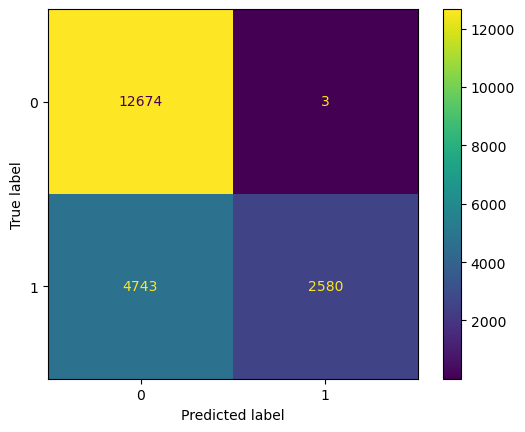

In [96]:
#rf = RandomForestClassifier(max_depth=5, min_samples_split=25, min_samples_leaf=6, criterion="log_loss", n_estimators=115, max_features="log2", bootstrap=True)
# cross_val_predict returns the predictions for each data point in the validation sets
val_preds = cross_val_predict(rf_rscv.best_estimator_, X_train2, y_train2, cv=kf)

cm = confusion_matrix(y_train2, val_preds, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=[0, 1])
disp.plot()
plt.show()

## Gradient Boosting Decision Tree

In [11]:
param_dist = {
    "max_depth": [3, 5, 10, 20],
    "min_samples_split": np.arange(2, 30),
    "min_samples_leaf": np.arange(1, 11),
    "criterion": ["friedman_mse", "squared_error"],
    "n_estimators": np.arange(2,200),
    "max_features": ["sqrt", "log2", 0.2, 0.4, 0.6, 0.8], 
    "learning_rate": [ 0.01, 0.025, 0.05, 0.075, 0.1]
}
gb = GradientBoostingClassifier()
gb_rscv = RandomizedSearchCV(gb, param_distributions=param_dist,
                             scoring=scoring, return_train_score=True,
                             cv=kf, verbose=1, n_iter=50,
                             refit="Prec", n_jobs=-1)

gb_rscv.fit(X_train2, y_train2)
print("Best RandomizedSearchCV parameters: ", gb_rscv.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best RandomizedSearchCV parameters:  {'n_estimators': 60, 'min_samples_split': 15, 'min_samples_leaf': 10, 'max_features': 0.2, 'max_depth': 5, 'learning_rate': 0.01, 'criterion': 'squared_error'}


In [13]:
print_metrics_rs(gb_rscv)

Train Precicios: 0.92
Validation Precision: 0.87

Train Recoll: 0.73
Validation Recoll: 0.65

Train Accuracy: 0.88
Validation Accuracy: 0.84


### Confusion Matrix

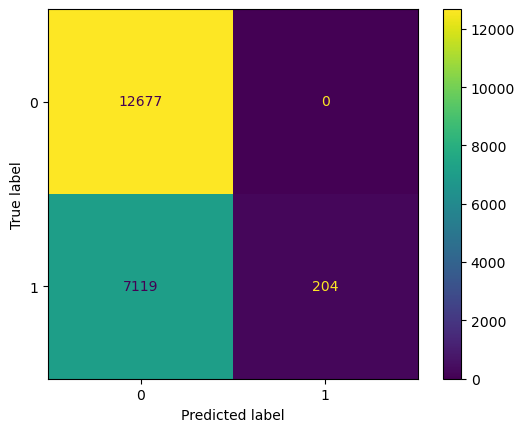

In [99]:
#gb = GradientBoostingClassifier(max_depth=20, min_samples_split=28, min_samples_leaf=7, criterion="friedman_mse", n_estimators=42, max_features="log2", learning_rate=0.01)
# cross_val_predict returns the predictions for each data point in the validation sets
val_preds = cross_val_predict(gb_rscv.best_estimator_, X_train2, y_train2, cv=kf)

cm = confusion_matrix(y_train2, val_preds, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=[0, 1])
disp.plot()
plt.show()

### Get closer

In [ ]:
'''
max_depth = list(range(2,30))

list_dt_Prec_train = []
list_dt_Prec_vali = []

for i in max_depth:
    gbdt = GradientBoostingClassifier(max_depth=i)
    cv_results = cross_validate(gbdt, X_train2, y_train2, cv=kf,
                            scoring=scoring, return_train_score=True, n_jobs=-1)
    
    list_dt_Prec_train.append(cv_results['train_Prec'].mean().round(1))
    list_dt_Prec_vali.append(cv_results['test_Prec'].mean().round(1))
'''    

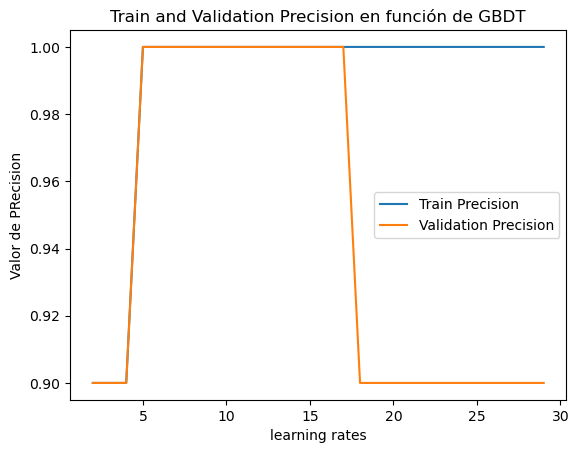

In [ ]:
'''
plt.plot(max_depth, list_dt_Prec_train, label='Train Precision')
plt.plot(max_depth, list_dt_Prec_vali, label='Validation Precision')
plt.xlabel('learning rates')
plt.ylabel('Valor de PRecision')
plt.title('Train and Validation Precision en función de GBDT')
plt.legend()
plt.show()
'''

In [ ]:
#{'n_estimators': 28, 'min_samples_split': 15, 'min_samples_leaf': 6, 'max_features': 'log2', 'max_depth': 3, 'learning_rate': 0.025, 'criterion': 'friedman_mse'}

param_dist = {
    "max_depth": [3, 5, 10, 15, 20, 23],
    "min_samples_split": np.arange(2, 30),
    "min_samples_leaf": np.arange(1, 11),
    "criterion": ["friedman_mse"],
    "n_estimators": np.arange(40,200),
    "max_features": ["log2"], 
    "learning_rate": [ 0.01, 0.025, 0.05, 0.075, 0.1]
}
gb = GradientBoostingClassifier()
gb_rscv1 = RandomizedSearchCV(gb, param_distributions=param_dist,
                             scoring=scoring, return_train_score=True,
                             cv=kf, verbose=1, n_iter=50,
                             refit="Prec", n_jobs=-1)

gb_rscv1.fit(X_train2, y_train2)
print("Best RandomizedSearchCV parameters: ", gb_rscv1.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best RandomizedSearchCV parameters:  {'n_estimators': 47, 'min_samples_split': 16, 'min_samples_leaf': 9, 'max_features': 'log2', 'max_depth': 15, 'learning_rate': 0.01, 'criterion': 'friedman_mse'}


In [ ]:
print_metrics_rs(gb_rscv1)

Train Precicios: 0.99
Validation Precision: 0.97

Train Recoll: 0.67
Validation Recoll: 0.62

Train Accuracy: 0.87
Validation Accuracy: 0.85


In [ ]:
param_dist = {
    "max_depth": [5, 10, 12, 15, 18, 20, 23],
    "min_samples_split": np.arange(2, 30),
    "min_samples_leaf": np.arange(1, 11),
    "criterion": ["friedman_mse"],
    "n_estimators": np.arange(40,150),
    "max_features": ["log2"], 
    "learning_rate": [0.075, 0.1, 0.15]
}
gb = GradientBoostingClassifier()
gb_rscv2 = RandomizedSearchCV(gb, param_distributions=param_dist,
                             scoring=scoring, return_train_score=True,
                             cv=kf, verbose=1, n_iter=50,
                             refit="Prec", n_jobs=-1)

gb_rscv2.fit(X_train2, y_train2)
print("Best RandomizedSearchCV parameters: ", gb_rscv2.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best RandomizedSearchCV parameters:  {'n_estimators': 77, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 23, 'learning_rate': 0.15, 'criterion': 'friedman_mse'}


In [ ]:
print_metrics_rs(gb_rscv2)

Train Precicios: 0.98
Validation Precision: 0.96

Train Recoll: 0.87
Validation Recoll: 0.8

Train Accuracy: 0.95
Validation Accuracy: 0.91


In [ ]:
param_dist = {
    "max_depth": [10, 12, 15, 18, 20, 23, 25],
    "min_samples_split": np.arange(2, 30),
    "min_samples_leaf": np.arange(1, 11),
    "criterion": ["friedman_mse"],
    "n_estimators": np.arange(40,150),
    "max_features": ["log2"], 
    "learning_rate": [0.09, 0.1, 0.15, 0.2]
}
gb = GradientBoostingClassifier()
gb_rscv3 = RandomizedSearchCV(gb, param_distributions=param_dist,
                             scoring=scoring, return_train_score=True,
                             cv=kf, verbose=1, n_iter=50,
                             refit="Prec", n_jobs=-1)

gb_rscv3.fit(X_train2, y_train2)
print("Best RandomizedSearchCV parameters: ", gb_rscv3.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best RandomizedSearchCV parameters:  {'n_estimators': 136, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 25, 'learning_rate': 0.15, 'criterion': 'friedman_mse'}


In [ ]:
print_metrics_rs(gb_rscv3)

Train Precicios: 0.99
Validation Precision: 0.96

Train Recoll: 0.94
Validation Recoll: 0.85

Train Accuracy: 0.98
Validation Accuracy: 0.93


In [ ]:
clf = GradientBoostingClassifier()

# Ajustar el clasificador a tus datos de entrenamiento
clf.fit(X_train2, y_train2)

# Get feature importances
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': clf.feature_importances_
}).sort_values(by="Importance", ascending=False)
feature_importances


,Feature,Importance
253,deposit_type_Non Refund,0.373673
175,country_PRT,0.098016
0,lead_time,0.087882
223,market_segment_Online TA,0.073394
18,total_of_special_requests,0.056441
...,...,...
128,country_KIR,0.000000
129,country_KNA,0.000000
130,country_KOR,0.000000
131,country_KWT,0.000000


#### Confusion Matrix

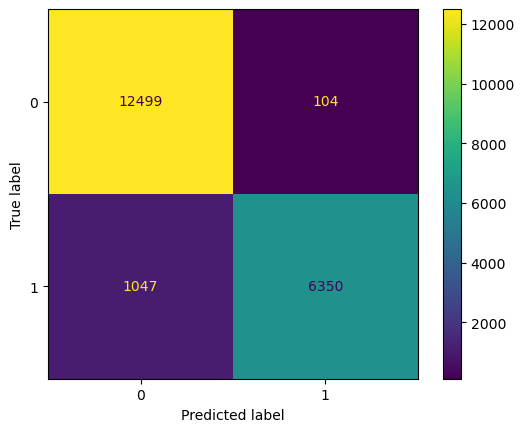

In [ ]:
gb = GradientBoostingClassifier(max_depth=25, min_samples_split=4, min_samples_leaf=1, criterion="friedman_mse", n_estimators=136, max_features="log2", learning_rate=0.15)
# cross_val_predict returns the predictions for each data point in the validation sets
val_preds = cross_val_predict(gb, X_train2, y_train2, cv=kf)

cm = confusion_matrix(y_train2, val_preds, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=[0, 1])
disp.plot()
plt.show()

###  ROC-AUC curve

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

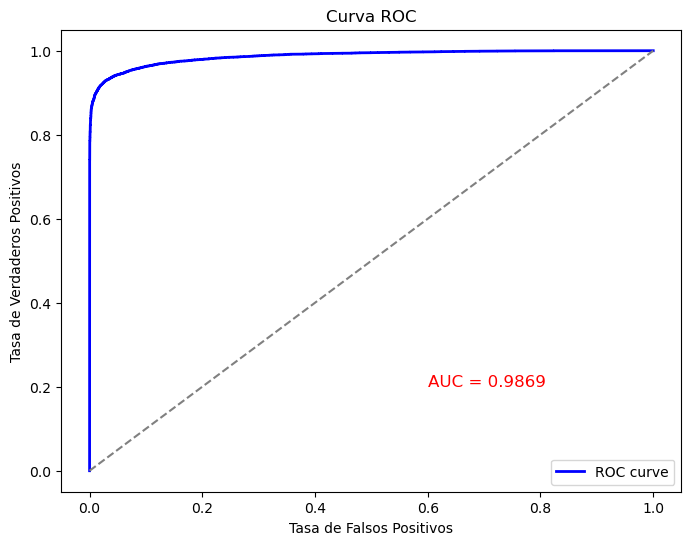

In [ ]:
# Obtén las probabilidades de predicción del modelo
y_pred_proba = gb_rscv3.predict_proba(X_test)[:, 1]

# Calcula la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Dibuja la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend()

# Calcula el AUC
auc = roc_auc_score(y_test, y_pred_proba)
plt.text(0.6, 0.2, f'AUC = {auc:.4f}', fontsize=12, color='red')
plt.show()

### Precision-Recall Curve

In [ ]:
from sklearn.metrics import precision_recall_curve

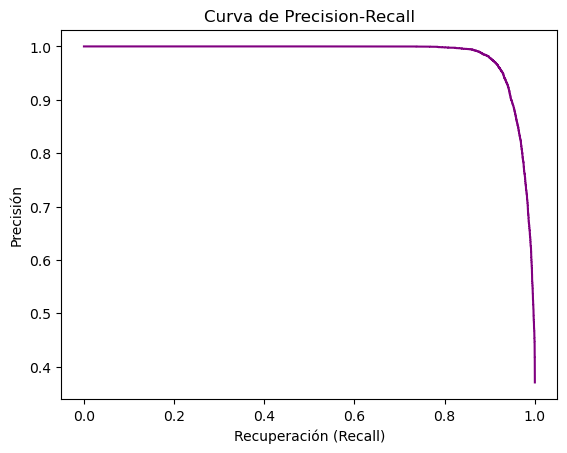

In [ ]:
y_pred_proba = gb_rscv3.predict_proba(X_test)[:, 1]

# Calcula la precisión y recuperación
precision, recall, _= precision_recall_curve(y_test, y_pred_proba)

# Crea la curva de precisión-recuperación
plt.plot(recall, precision, color='purple')
plt.xlabel('Recuperación (Recall)')
plt.ylabel('Precisión')
plt.title('Curva de Precision-Recall')
plt.show()

## Imbalanced Classes Test

In [ ]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.ensemble import BalancedRandomForestClassifier

In [ ]:
# Define las etapas del pipeline
pipeline = ImbPipeline([
    ('undersample', RandomUnderSampler()),
    ('oversample', RandomOverSampler()),
    ('smote', SMOTEENN()),
    ('classifier', BalancedRandomForestClassifier())
])

# Ajusta el modelo
pipeline.fit(X_train2, y_train2)

# Evalúa el rendimiento en el conjunto de prueba
accuracy = pipeline.score(X_test, y_test)
print(f"Precisión del modelo: {accuracy:.2f}")

c:\Users\Alumne_mati1\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\Alumne_mati1\anaconda3\Lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


Precisión del modelo: 0.84


In [ ]:
param_dist = {
    "scale": [StandardScaler(), RobustScaler(), MinMaxScaler(), MaxAbsScaler()],
    "knn__n_neighbors": [3, 5, 8, 10, 12, 15, 20],
    "knn__weights": ["uniform", "distance"],
    "knn__p": [1, 2]
}

knn = ImbPipeline([
    ('scale', None),
    ('knn', KNeighborsClassifier(n_jobs=-1))
])

param_dist = {
    "max_depth": [10, 12, 15, 18, 20, 23, 25],
    "min_samples_split": np.arange(2, 30),
    "min_samples_leaf": np.arange(1, 11),
    "criterion": ["friedman_mse"],
    "n_estimators": np.arange(40,150),
    "max_features": ["log2"], 
    "learning_rate": [0.09, 0.1, 0.15, 0.2]
}
gb = GradientBoostingClassifier()

knn_rscv = RandomizedSearchCV(knn, param_distributions=param_dist,
                              scoring=scoring, return_train_score=True,
                              cv=kf,
                              refit="Prec")

knn_rscv.fit(X_train2, y_train2)
print("Mejores parámetros de RandomizedSearchCV: ", knn_rscv.best_params_)

## Test

In [17]:
gb = GradientBoostingClassifier(n_estimators= 60, min_samples_split=15, min_samples_leaf=10, max_features=0.2, max_depth=5, learning_rate=0.01, criterion='squared_error')

gb_good = cross_validate(gb, X_train, y_train, cv=kf,
                       scoring=scoring, return_train_score=True, n_jobs=-1)

In [19]:
gb_good

{'fit_time': array([10.26011491, 10.35689712, 10.36486316, 10.52496314, 10.35107946]),
 'score_time': array([0.15964413, 0.19906878, 0.16893268, 0.23198891, 0.24504614]),
 'test_Acc': array([0.76872743, 0.76506308, 0.76667365, 0.76719715, 0.76379437]),
 'train_Acc': array([0.76545957, 0.76722637, 0.76784452, 0.76476901, 0.76681063]),
 'test_Prec': array([0.99812594, 0.9996139 , 0.99847677, 0.99924041, 1.        ]),
 'train_Prec': array([0.99942274, 0.99943015, 0.99990537, 0.99913018, 0.99961879]),
 'test_Rec': array([0.37634257, 0.36588468, 0.37060071, 0.37182024, 0.36235161]),
 'train_Rec': array([0.36702823, 0.37179804, 0.37330413, 0.36526163, 0.37059676])}

In [20]:
print_metrics(gb_good)

Train Acc: 0.77
Train Prec: 1.0
Train Rec: 0.37

Validation Acc: 0.77
Validation Prec: 1.0
Validation Rec: 0.37


GBDT
Train Accuracy: 0.7658200016751822
Test Precision: 0.9993802293151534
Test Recall: 0.3646127755794234



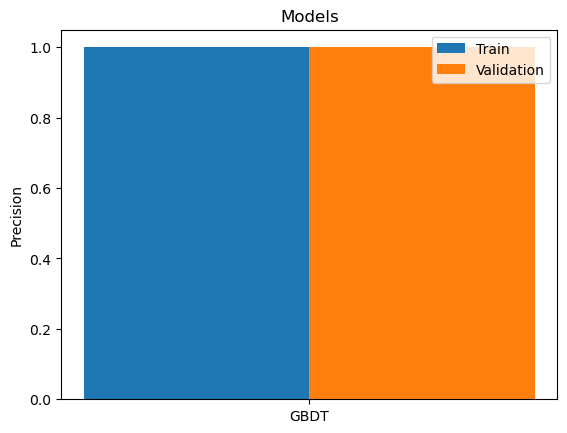

In [16]:
models = [
    ('GBDT', gb_rscv),
]

y_train_axis = []
y_valid_axis = []

for name, model in models:
    model.best_estimator_.fit(X_train, y_train)
    y_train_pred = model.best_estimator_.predict(X_train)
    y_test_pred = model.best_estimator_.predict(X_test)
    y_train_axis.append(precision_score(y_train, y_train_pred))
    y_valid_axis.append(precision_score(y_test, y_test_pred))
    print(name)
    print('Train Precision:', precision_score(y_train, y_train_pred))
    print('Test Precision:', precision_score(y_test, y_test_pred))
    print('Test Recall:', recall_score(y_test, y_test_pred))
    print()

x_axis = np.arange(len(models))
plt.bar(x_axis - 0.2, y_train_axis, 0.4, label = 'Train')
plt.bar(x_axis + 0.2, y_valid_axis, 0.4, label = 'Validation')
  
plt.xticks(x_axis, [name for name, _ in models])
plt.ylabel('Precision')
plt.title('Models')
plt.legend()
plt.show()

## Neronal Network

### Train / Test

In [54]:
sampled_df = df.sample(frac=0.15, random_state=42).reset_index(drop=True)

X2 = sampled_df.drop('is_canceled', axis=1)
y2 = sampled_df['is_canceled']

# Train / Test split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Train / Validation split
X2_train, X2_val, y2_train, y2_val = train_test_split(X2_train, y2_train, test_size=0.2, random_state=42)

In [55]:
from sklearn.preprocessing import RobustScaler

# Scale the data

scaler = RobustScaler().fit(X2_train)
X2_train = scaler.transform(X2_train)
X2_val = scaler.transform(X2_val)
X2_test = scaler.transform(X2_test)

### Model

#### Sigmoid Neuron

In [58]:
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam

In [62]:
X2_train.shape[1]

259

In [61]:
# Define the NN model

model = Sequential([
    Input(X2_train.shape[1]),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model.compile(optimizer=Adam(learning_rate=0.01),
              loss='binary_crossentropy',
              metrics=[Precision(), Recall()])

In [46]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 16)                4160      
                                                                 
 dense_13 (Dense)            (None, 8)                 136       
                                                                 
 dense_14 (Dense)            (None, 1)                 9         
                                                                 
Total params: 4305 (16.82 KB)
Trainable params: 4305 (16.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [52]:
from tensorflow.keras.callbacks import EarlyStopping

In [53]:
# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_precision_5', patience=5)

# Fit the model with the EarlyStopping callback
results = model.fit(X2_train, y2_train, epochs=75, batch_size=16, validation_data=(X2_val, y2_val), callbacks=[early_stopping])

Epoch 1/75
717/717 [==============================] - 2s 1ms/step - loss: 0.4351 - precision_5: 0.7963 - recall_5: 0.6359 - val_loss: 0.3790 - val_precision_5: 0.7667 - val_recall_5: 0.7174
Epoch 2/75
717/717 [==============================] - 1s 1ms/step - loss: 0.3631 - precision_5: 0.8081 - recall_5: 0.7219 - val_loss: 0.3567 - val_precision_5: 0.8594 - val_recall_5: 0.6645
Epoch 3/75
717/717 [==============================] - 1s 1ms/step - loss: 0.3487 - precision_5: 0.8263 - recall_5: 0.7265 - val_loss: 0.3520 - val_precision_5: 0.8135 - val_recall_5: 0.7297
Epoch 4/75
717/717 [==============================] - 1s 1ms/step - loss: 0.3340 - precision_5: 0.8392 - recall_5: 0.7359 - val_loss: 0.3640 - val_precision_5: 0.8201 - val_recall_5: 0.7108
Epoch 5/75
717/717 [==============================] - 1s 1ms/step - loss: 0.3286 - precision_5: 0.8418 - recall_5: 0.7417 - val_loss: 0.3712 - val_precision_5: 0.7626 - val_recall_5: 0.7713
Epoch 6/75
717/717 [==============================

In [57]:
results = model.fit(X2_train, y2_train, epochs=75, batch_size=16, validation_data=(X2_val, y2_val))

Epoch 1/75
717/717 [==============================] - 1s 1ms/step - loss: 0.4219 - precision_6: 0.7905 - recall_6: 0.6652 - val_loss: 0.3639 - val_precision_6: 0.7964 - val_recall_6: 0.7543
Epoch 2/75
717/717 [==============================] - 1s 1ms/step - loss: 0.3645 - precision_6: 0.8125 - recall_6: 0.7221 - val_loss: 0.3556 - val_precision_6: 0.8612 - val_recall_6: 0.6512
Epoch 3/75
717/717 [==============================] - 1s 1ms/step - loss: 0.3434 - precision_6: 0.8279 - recall_6: 0.7295 - val_loss: 0.3379 - val_precision_6: 0.8060 - val_recall_6: 0.7580
Epoch 4/75
717/717 [==============================] - 1s 1ms/step - loss: 0.3338 - precision_6: 0.8317 - recall_6: 0.7468 - val_loss: 0.3397 - val_precision_6: 0.8250 - val_recall_6: 0.7486
Epoch 5/75
717/717 [==============================] - 1s 1ms/step - loss: 0.3207 - precision_6: 0.8452 - recall_6: 0.7562 - val_loss: 0.3413 - val_precision_6: 0.8215 - val_recall_6: 0.7353
Epoch 6/75
717/717 [==============================

In [14]:
# The `results` object contains the loss and metrics values for the training data

results.history.keys()

dict_keys(['loss', 'precision', 'recall', 'val_loss', 'val_precision', 'val_recall'])

In [16]:
results.history['val_precision'][-5:]

[0.8061440587043762,
 0.8071278929710388,
 0.8284424543380737,
 0.8026859760284424,
 0.7845691442489624]

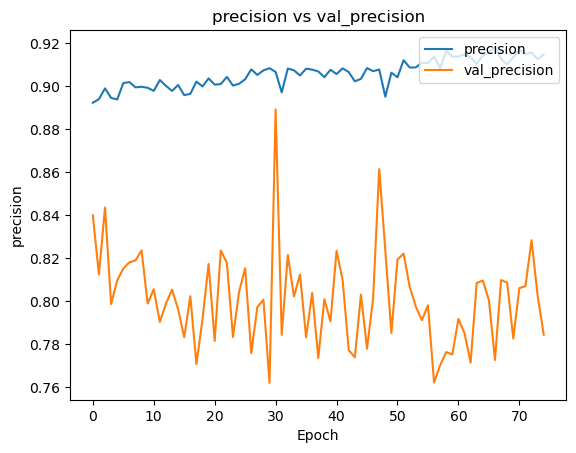

In [17]:
plt.plot(results.history['precision'])
plt.plot(results.history['val_precision'])
plt.title('precision vs val_precision')
plt.ylabel('precision')
plt.xlabel('Epoch')
plt.legend(['precision', 'val_precision'], loc='upper right')
plt.show()

In [67]:
# Define the NN model

model2 = Sequential([
    Input(X2_train.shape[1]),
    Dense(259, activation='relu'),
    Dense(130, activation='relu'),
    Dense(65, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model2.compile(optimizer=Adam(learning_rate=0.01),
              loss='binary_crossentropy',
              metrics=[Precision(), Recall()])

In [68]:
model2.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 259)               67340     
                                                                 
 dense_30 (Dense)            (None, 130)               33800     
                                                                 
 dense_31 (Dense)            (None, 65)                8515      
                                                                 
 dense_32 (Dense)            (None, 32)                2112      
                                                                 
 dense_33 (Dense)            (None, 1)                 33        
                                                                 
Total params: 111800 (436.72 KB)
Trainable params: 111800 (436.72 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [71]:
# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_precision_9', patience=5)

# Fit the model with the EarlyStopping callback
results2 = model2.fit(X2_train, y2_train, epochs=75, batch_size=16, validation_data=(X2_val, y2_val), callbacks=[early_stopping])

Epoch 1/75
717/717 [==============================] - 1s 1ms/step - loss: 0.2458 - precision_9: 0.9159 - recall_9: 0.7827 - val_loss: 0.4338 - val_precision_9: 0.8380 - val_recall_9: 0.7089
Epoch 2/75
717/717 [==============================] - 1s 1ms/step - loss: 0.2294 - precision_9: 0.9200 - recall_9: 0.8108 - val_loss: 0.4082 - val_precision_9: 0.8415 - val_recall_9: 0.6975
Epoch 3/75
717/717 [==============================] - 1s 1ms/step - loss: 0.2127 - precision_9: 0.9248 - recall_9: 0.8217 - val_loss: 0.5147 - val_precision_9: 0.8481 - val_recall_9: 0.6493
Epoch 4/75
717/717 [==============================] - 1s 1ms/step - loss: 0.2277 - precision_9: 0.9208 - recall_9: 0.7984 - val_loss: 0.4776 - val_precision_9: 0.8233 - val_recall_9: 0.7004
Epoch 5/75
717/717 [==============================] - 1s 1ms/step - loss: 0.2204 - precision_9: 0.9313 - recall_9: 0.8062 - val_loss: 0.6783 - val_precision_9: 0.8144 - val_recall_9: 0.7051
Epoch 6/75
717/717 [==============================

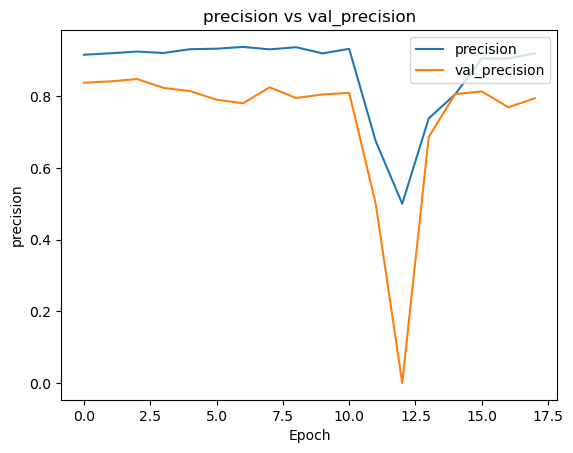

In [74]:
plt.plot(results2.history['precision_9'])
plt.plot(results2.history['val_precision_9'])
plt.title('precision vs val_precision')
plt.ylabel('precision')
plt.xlabel('Epoch')
plt.legend(['precision', 'val_precision'], loc='upper right')
plt.show()